In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading in the data in a DataFrame

titanic_data = pd.read_csv("C:/Users/hp/Desktop/DAND P2/P2/titanic-data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some of the key variables here to compare with the 'Survived' column, would be 'Sex', 'Age', 'Pclass' and 'Embarked'

In [3]:
# Statistical Properties of the dataset

titanic_data.describe()

C:\Users\hp\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_data['Embarked'].max()

'S'

In [6]:
# Filling missing values of the 'Embarked' column

titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Filling missing values of the 'Age' column

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


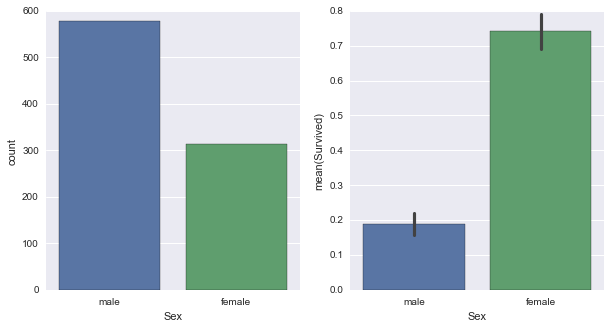

In [10]:
# Seeing the correlation between the Sex of the passengers and their chance of Survival

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Sex', data = titanic_data, ax = axis1)
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_data, ax = axis2, order = ['male', 'female'])

It seems from the above figures, that the chance of survival of females is much more as compared to that of males. Female passengers were given first priority in rescue operations.

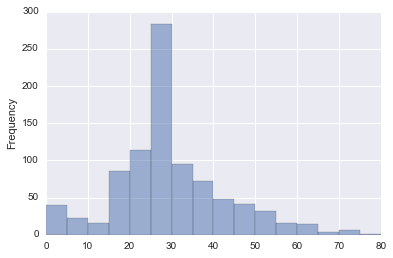

In [11]:
# Viewing the distribution of passengers while taking their Age into consideration. 

plt.figure()
titanic_data['Age'].plot.hist(bins = 16, range = (0, 80), alpha = 0.5)

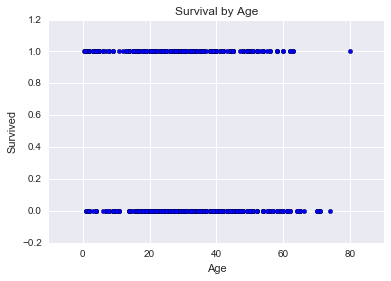

In [12]:
# Comparing their Age to their chances of Survival

plt.scatter(titanic_data['Age'], titanic_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survival by Age')

It seems somewhat from the above scatterplot, that people of lesser ages were given the priority in rescue operations. Essentially children. Also the elderly were given priority. Adult males were the worst affected. 

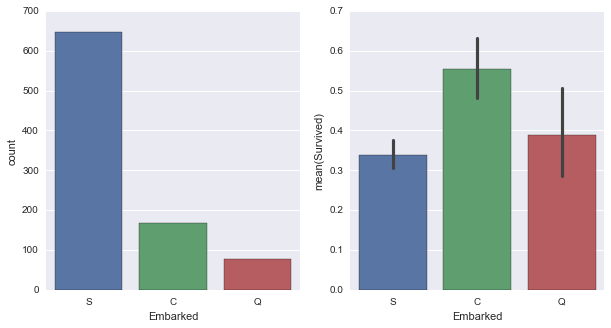

In [13]:
# Comparing the Survival rate with respect to their boarding points. 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Embarked', data = titanic_data, ax = axis1)
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic_data, ax = axis2)

Not any clear correlation. We can say that the people who boarded at the 'C' station had quite a high chance of Survival.

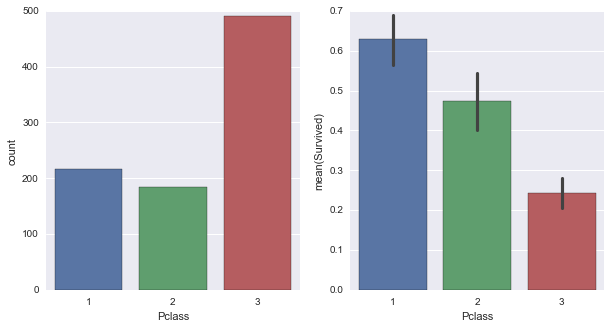

In [14]:
# Comparing the Survival rate in consideration with class of their cabin.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Pclass', data = titanic_data, ax = axis1)
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_data, ax = axis2)

The Pclass variable indicates the cabin type with P1 being the first class and subsequently being the most expensive. There is a definite correlation here. We can see that rich and influential people might have been prioritized in comparison with other lower class people. 
Survival rate among the higher class is definitely much higher than the other two lower classes.

A little help was taken from the following kaggle profile in getting ideas about the visualizations - 
https://www.kaggle.com/malais/titanic/kaggle-first-ipythonnotebook/run/96456

Also the documentation of the libraries used has been instrumental in understanding the functions and their usage.